In [54]:
import numpy as np
from PIL import Image
from IPython.display import display,Math,Latex
import matplotlib.pyplot as plt

img = Image.open('image3.jpg')



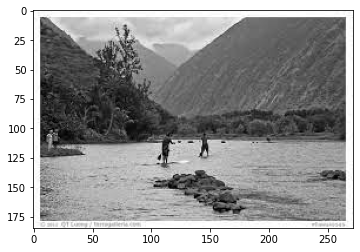

In [55]:
plt.imshow(img,cmap='gray')


In [56]:
#Image to numpy array
img = np.asarray(img)

(array([  393.,   189.,   192.,   474.,   588.,   639.,   885.,  1158.,
         1077.,  1746.,  1830.,  1500.,  2157.,  1764.,  2388.,  2421.,
         2031.,  2817.,  2736.,  2115.,  2991.,  3153.,  2286.,  3249.,
         3747.,  3624.,  5070.,  3846.,  5085.,  4824.,  2970.,  2850.,
         1953.,  1185.,  1464.,  1485.,  1221.,  1962.,  1860.,  1248.,
         1968.,  1617.,  2193.,  2802.,  2397.,  3117.,  3324.,  2487.,
         3528.,  3579.,  2898.,  3750.,  3894.,  2370.,  2481.,  1506.,
         1827.,  1371.,   711.,   870.,   702.,   441.,   396.,   273.,
          150.,   306.,   417.,   750.,  2637., 11025.]),
 array([  0.        ,   3.64285714,   7.28571429,  10.92857143,
         14.57142857,  18.21428571,  21.85714286,  25.5       ,
         29.14285714,  32.78571429,  36.42857143,  40.07142857,
         43.71428571,  47.35714286,  51.        ,  54.64285714,
         58.28571429,  61.92857143,  65.57142857,  69.21428571,
         72.85714286,  76.5       ,  80.142857

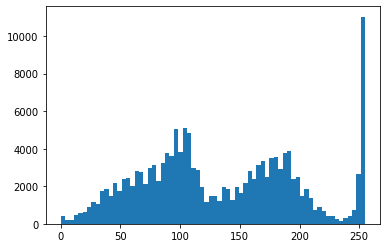

In [57]:
#1D array of image pixels flatened image array
flatened  = img.flatten()

#histogramm
plt.hist(flatened,bins=70)


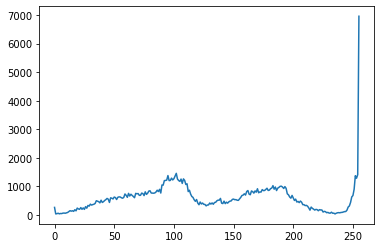

In [58]:
#histogram function

def get_histogram(img,bins):
    histogram = np.zeros(bins)
    for pixels in img:
        histogram[pixels]+=1

    return histogram

hist = get_histogram(flatened,256)

plt.plot(hist)

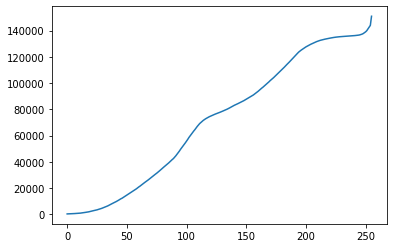

In [59]:
#Cumulative sum function
def aggrSum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

#function call
cs = aggrSum(hist)

#result
plt.plot(cs)

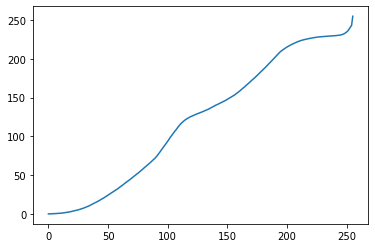

In [60]:
#normalizing Cumulative sum values to be b/w  0-255

P = (cs - cs.min())*255

Q = cs.max() - cs.min()

#renormalizing the vale

cs = P/Q

plt.plot(cs)

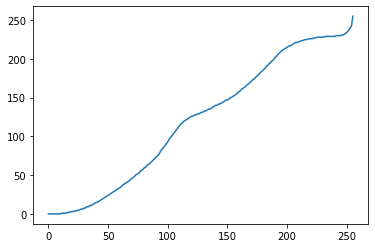

In [61]:
#converting to uint so to use in images

cs = cs.astype('uint8')
plt.plot(cs)

(array([2475., 2418., 1473., 2370., 2511., 1581., 2370., 2409., 1794.,
        2031., 2817., 1998., 2169., 1446., 2229., 2310., 2370., 2328.,
        1680., 1659., 3288., 1206., 2595., 2406., 2511., 1266., 2811.,
        1254., 2376., 2355., 2469., 2154., 2409., 1785., 2229., 2538.,
        1581., 2394., 2697., 1347., 2649., 1581., 1983., 2250., 2283.,
        2412., 2550., 1578., 2532., 1746., 1788., 2724., 1923., 1827.,
        2898., 1980., 1914., 2370., 1893., 2565., 2394., 1746., 2436.,
        2229., 1575., 2655., 1410.,    0.,    0., 6960.]),
 array([  0.        ,   3.64285714,   7.28571429,  10.92857143,
         14.57142857,  18.21428571,  21.85714286,  25.5       ,
         29.14285714,  32.78571429,  36.42857143,  40.07142857,
         43.71428571,  47.35714286,  51.        ,  54.64285714,
         58.28571429,  61.92857143,  65.57142857,  69.21428571,
         72.85714286,  76.5       ,  80.14285714,  83.78571429,
         87.42857143,  91.07142857,  94.71428571,  98.357142

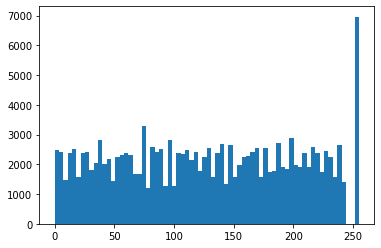

In [62]:
#setting the new image
equalizedImage = cs[flatened]

#Notice the output much more even 
plt.hist(equalizedImage,bins=70)

In [63]:
#reshaping 
equalizedImage = np.reshape(equalizedImage,img.shape)

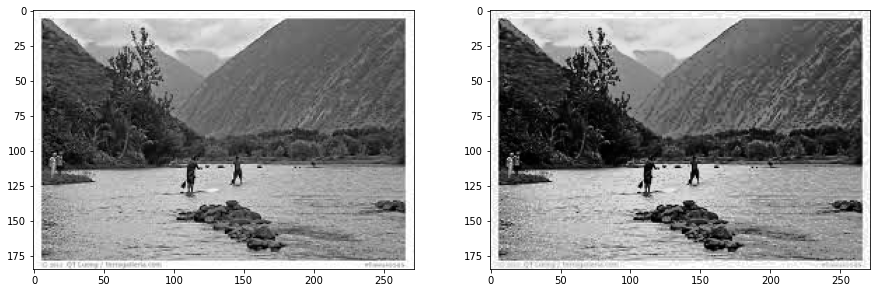

In [64]:
res = plt.figure(figsize=(15,15))

#To show images side by side
res.add_subplot(1,2,1)

plt.imshow(img,cmap="gray")

res.add_subplot(1,2,2)
plt.imshow(equalizedImage,cmap="gray")

plt.show(block=True)

#Notice the difference most noticable in the mountain color